# **Importing the Library**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
tf.__version__

'2.8.0'

In [5]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |


# **Image Data Exploration**

In [6]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path1 = '/content/drive/MyDrive/downsyn/train'
test_path1 = '/content/drive/MyDrive/downsyn/test'

# **Image Processing & Scaling**

In [7]:
# Scaling all the images between 0 to 1

train_datagen1 = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen1 = ImageDataGenerator(rescale=1./255)

In [8]:
train_set1 = train_datagen1.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen1.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1927 images belonging to 2 classes.
Found 970 images belonging to 2 classes.


# DenseNet

In [9]:
from tensorflow.keras.applications.densenet import DenseNet121
mob1 = DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29097984/29084464 [==============================] - 0s 0us/step


In [10]:
x1= Flatten()(mob1.output)
prediction1 = Dense(2, activation='softmax')(x1)
model121 = Model(inputs = mob1.inputs, outputs = prediction1)
model121.summary()
model121.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
r1 = model121.fit(train_set1, validation_data=test_set1, epochs=200)

Epoch 1/200
61/61 [==============================] - 620s 10s/step - loss: 2.9936 - accuracy: 0.6476 - val_loss: 118.7588 - val_accuracy: 0.5062
Epoch 2/200
61/61 [==============================] - 54s 875ms/step - loss: 2.8761 - accuracy: 0.5983 - val_loss: 566.2998 - val_accuracy: 0.5320
Epoch 3/200
61/61 [==============================] - 55s 894ms/step - loss: 1.7381 - accuracy: 0.6539 - val_loss: 59.0806 - val_accuracy: 0.5660
Epoch 4/200
61/61 [==============================] - 55s 888ms/step - loss: 3.0108 - accuracy: 0.5444 - val_loss: 11048793.0000 - val_accuracy: 0.4948
Epoch 5/200
61/61 [==============================] - 54s 886ms/step - loss: 1.6503 - accuracy: 0.5584 - val_loss: 1275.0502 - val_accuracy: 0.5299
Epoch 6/200
61/61 [==============================] - 54s 884ms/step - loss: 2.0465 - accuracy: 0.5947 - val_loss: 17543.4395 - val_accuracy: 0.5041
Epoch 7/200
61/61 [==============================] - 54s 887ms/step - loss: 3.0452 - accuracy: 0.5937 - val_loss: 4467

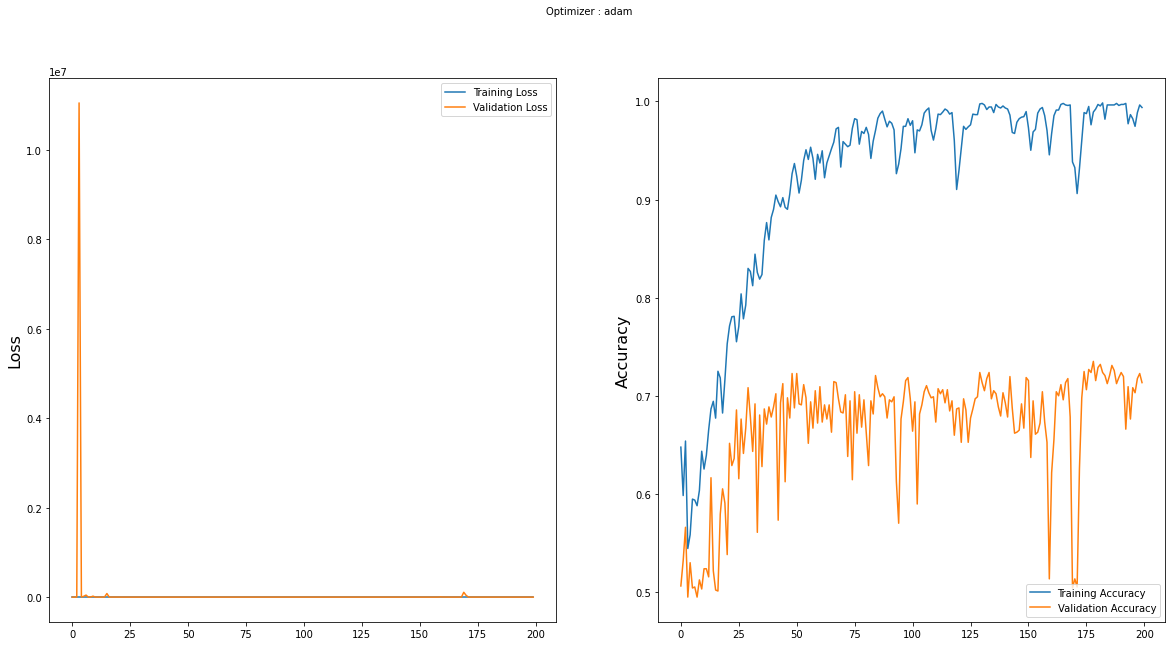

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Inception ResNet V2

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(2, activation='softmax')(x31)

In [ ]:
modelss1 = Model(inputs = inc.inputs, outputs = predictionss)
modelss1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
modelss1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss1.fit_generator(train_set1, validation_data=test_set1, epochs=10, steps_per_epoch=len(train_set1), validation_steps=len(test_set1))
x=r2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
61/61 [==============================] - 125s 2s/step - loss: 1.1696 - accuracy: 0.7390 - val_loss: 1925.7548 - val_accuracy: 0.4876
Epoch 2/10
61/61 [==============================] - 92s 1s/step - loss: 1.6270 - accuracy: 0.7971 - val_loss: 338.2780 - val_accuracy: 0.5196
Epoch 3/10
61/61 [==============================] - 91s 1s/step - loss: 2.7057 - accuracy: 0.7654 - val_loss: 2258.4319 - val_accuracy: 0.4546
Epoch 4/10
61/61 [==============================] - 91s 1s/step - loss: 1.4120 - accuracy: 0.7494 - val_loss: 348.1783 - val_accuracy: 0.4938
Epoch 5/10
61/61 [==============================] - 91s 1s/step - loss: 2.1070 - accuracy: 0.7701 - val_loss: 927.1227 - val_accuracy: 0.6093
Epoch 6/10
61/61 [==============================] - 91s 1s/step - loss: 1.5122 - accuracy: 0.7748 - val_loss: 103.7222 - val_accuracy: 0.6825
Epoch 7/10
61/61 [==============================] - 91s 1s/step - loss: 0.9792 - accuracy: 0.7779 - val_loss: 2.0500 - val_accuracy: 0.7093
Epoch

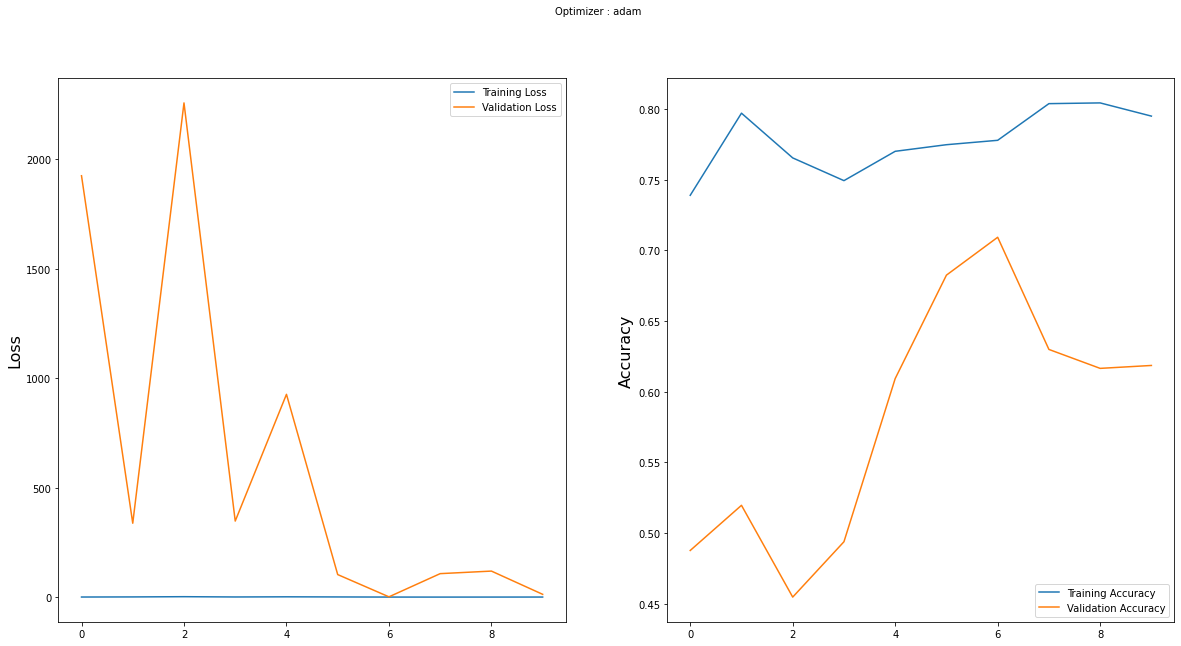

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
modelss1.save('/content/drive/MyDrive/downsyn/model1.h5')

In [ ]:
model121.save('/content/drive/MyDrive/downsyn/model.h5')